In [ ]:
import os
if not os.path.exists("clef-data"):
  # !wget https://sideris.dev/apallaktiki-5.zip
  !mkdir -p clef-data
  !unzip /content/clef_small_dataset.zip -d clef-data

Create Database and connect to it

In [8]:
import sqlite3 as sl
con = sl.connect('tf-idf.db')
con.close()

extract abstracts from patents first and then

*Open* a folder of files one by one, and create database to use for tf idt

In [ ]:
import glob, os, re, time
from bs4 import BeautifulSoup


path = '/content/clef-data/clef_small_dataset/00' # TODO LOOP THROUGH FOLDERS (00, 01, 02, ...)
data = os.listdir(path) # fakelos me xml arxeia
print(data)
con = sl.connect('tf-idf.sqlite')
con.execute('''CREATE TABLE IF NOT EXISTS document
         (document_id TEXT PRIMARY KEY     NOT NULL,
         total_words_not_unique INT NOT NULL,
         title           TEXT    NOT NULL) ''')

con.execute('''CREATE TABLE IF NOT EXISTS word
         (word_id INT PRIMARY KEY     NOT NULL,
         word           TEXT    NOT NULL) ''')

con.execute('''CREATE TABLE IF NOT EXISTS word_in_document
         (id INTEGER PRIMARY KEY,
         word_id INT NOT NULL REFERENCES word (word_id),
         document_id TEXT NOT NULL REFERENCES document (document_id),
         word TEXT NOT NULL,
         quantity INT NOT NULL) ''')

print ("Table created successfully");
with open('test.docterm_recall', 'w', encoding='utf-8') as writer:
    i = 0
    j = 0;
    for xml in data:
        print(xml + ' - ' + str(i) + ' of ' + str(len(data)), end="\r")
        i = i + 1
        if (i > 5):
            break;
        
        p = path + '/' + xml
        patent = open(path + '/' + xml, 'r')

        root = BeautifulSoup(patent);
        # print(root)
        abstract = root.find('abstract');
        title = root.find('title');
        c = con.cursor()

        if (title): 
          title = re.sub(r'\n', '', title.text)

          if abstract:
            howManyWords = len(abstract.text.split())
          else:
            hownManyWords = 0;

          c.execute(f"INSERT OR IGNORE INTO document (document_id, title, total_words_not_unique) VALUES ('{xml}', '{title}', {howManyWords})")


        if abstract:
          for word in abstract.text.split():
            j = j + 1;
            word = re.sub(r"[,./;:()']", '', word)
            # print(word)

            if word and word != '':
              c.execute(f"SELECT word_id from word WHERE word = '{word}'")
              row = c.fetchone(); # find if WORD EXISTS IN DATABASE ALREADY

              if row and row[0]: # if it exists, do insert or ignore
                id = str(row[0])
                c.execute(f"INSERT OR IGNORE INTO word (word_id, word) VALUES ('{id}', '{word}')")
              else: # else, insert new word with a new id
                id = str(j)
                c.execute(f"INSERT OR IGNORE INTO word (word_id, word) VALUES ('{str(j)}', '{word}')")
              
              c.execute(f"SELECT word_id from word_in_document WHERE word_id = '{id}' AND document_id='{xml}'")
              row = c.fetchone(); # find if word in document already exists in DATABASE
              # print(row)
              if row and row[0]: # if it exists, increment quantity by 1
                # print('update')
                c.execute(f"UPDATE word_in_document SET quantity = quantity + 1 WHERE word_id = '{id}' AND document_id = '{xml}'")
              else:             # else, insert new word_in_document row
                # print('insert') 
                c.execute(f"INSERT INTO word_in_document (word_id, document_id, word, quantity) VALUES ('{id}', '{xml}', '{word}', 1)")


c.execute(f'select * from document')
rows = c.fetchall();
for row in rows:
  print(row)
con.close()

TF-IDF 

tf = occurences of the word / total words (quantity, not unique words)

idf = log (total number of documents / number of documents containing the word 

tfIdf = tf * idf

Calculate TF-IDF for every word_in_document

In [ ]:
# TODO CALCULATE TF_IDF
con = sl.connect('tf-idf.sqlite')


Create docterm.recall for deepCT by using TF_IDF values calculated before

In [ ]:
# TODO CREATE DOCTERM.RECALL FOR DEEPCT

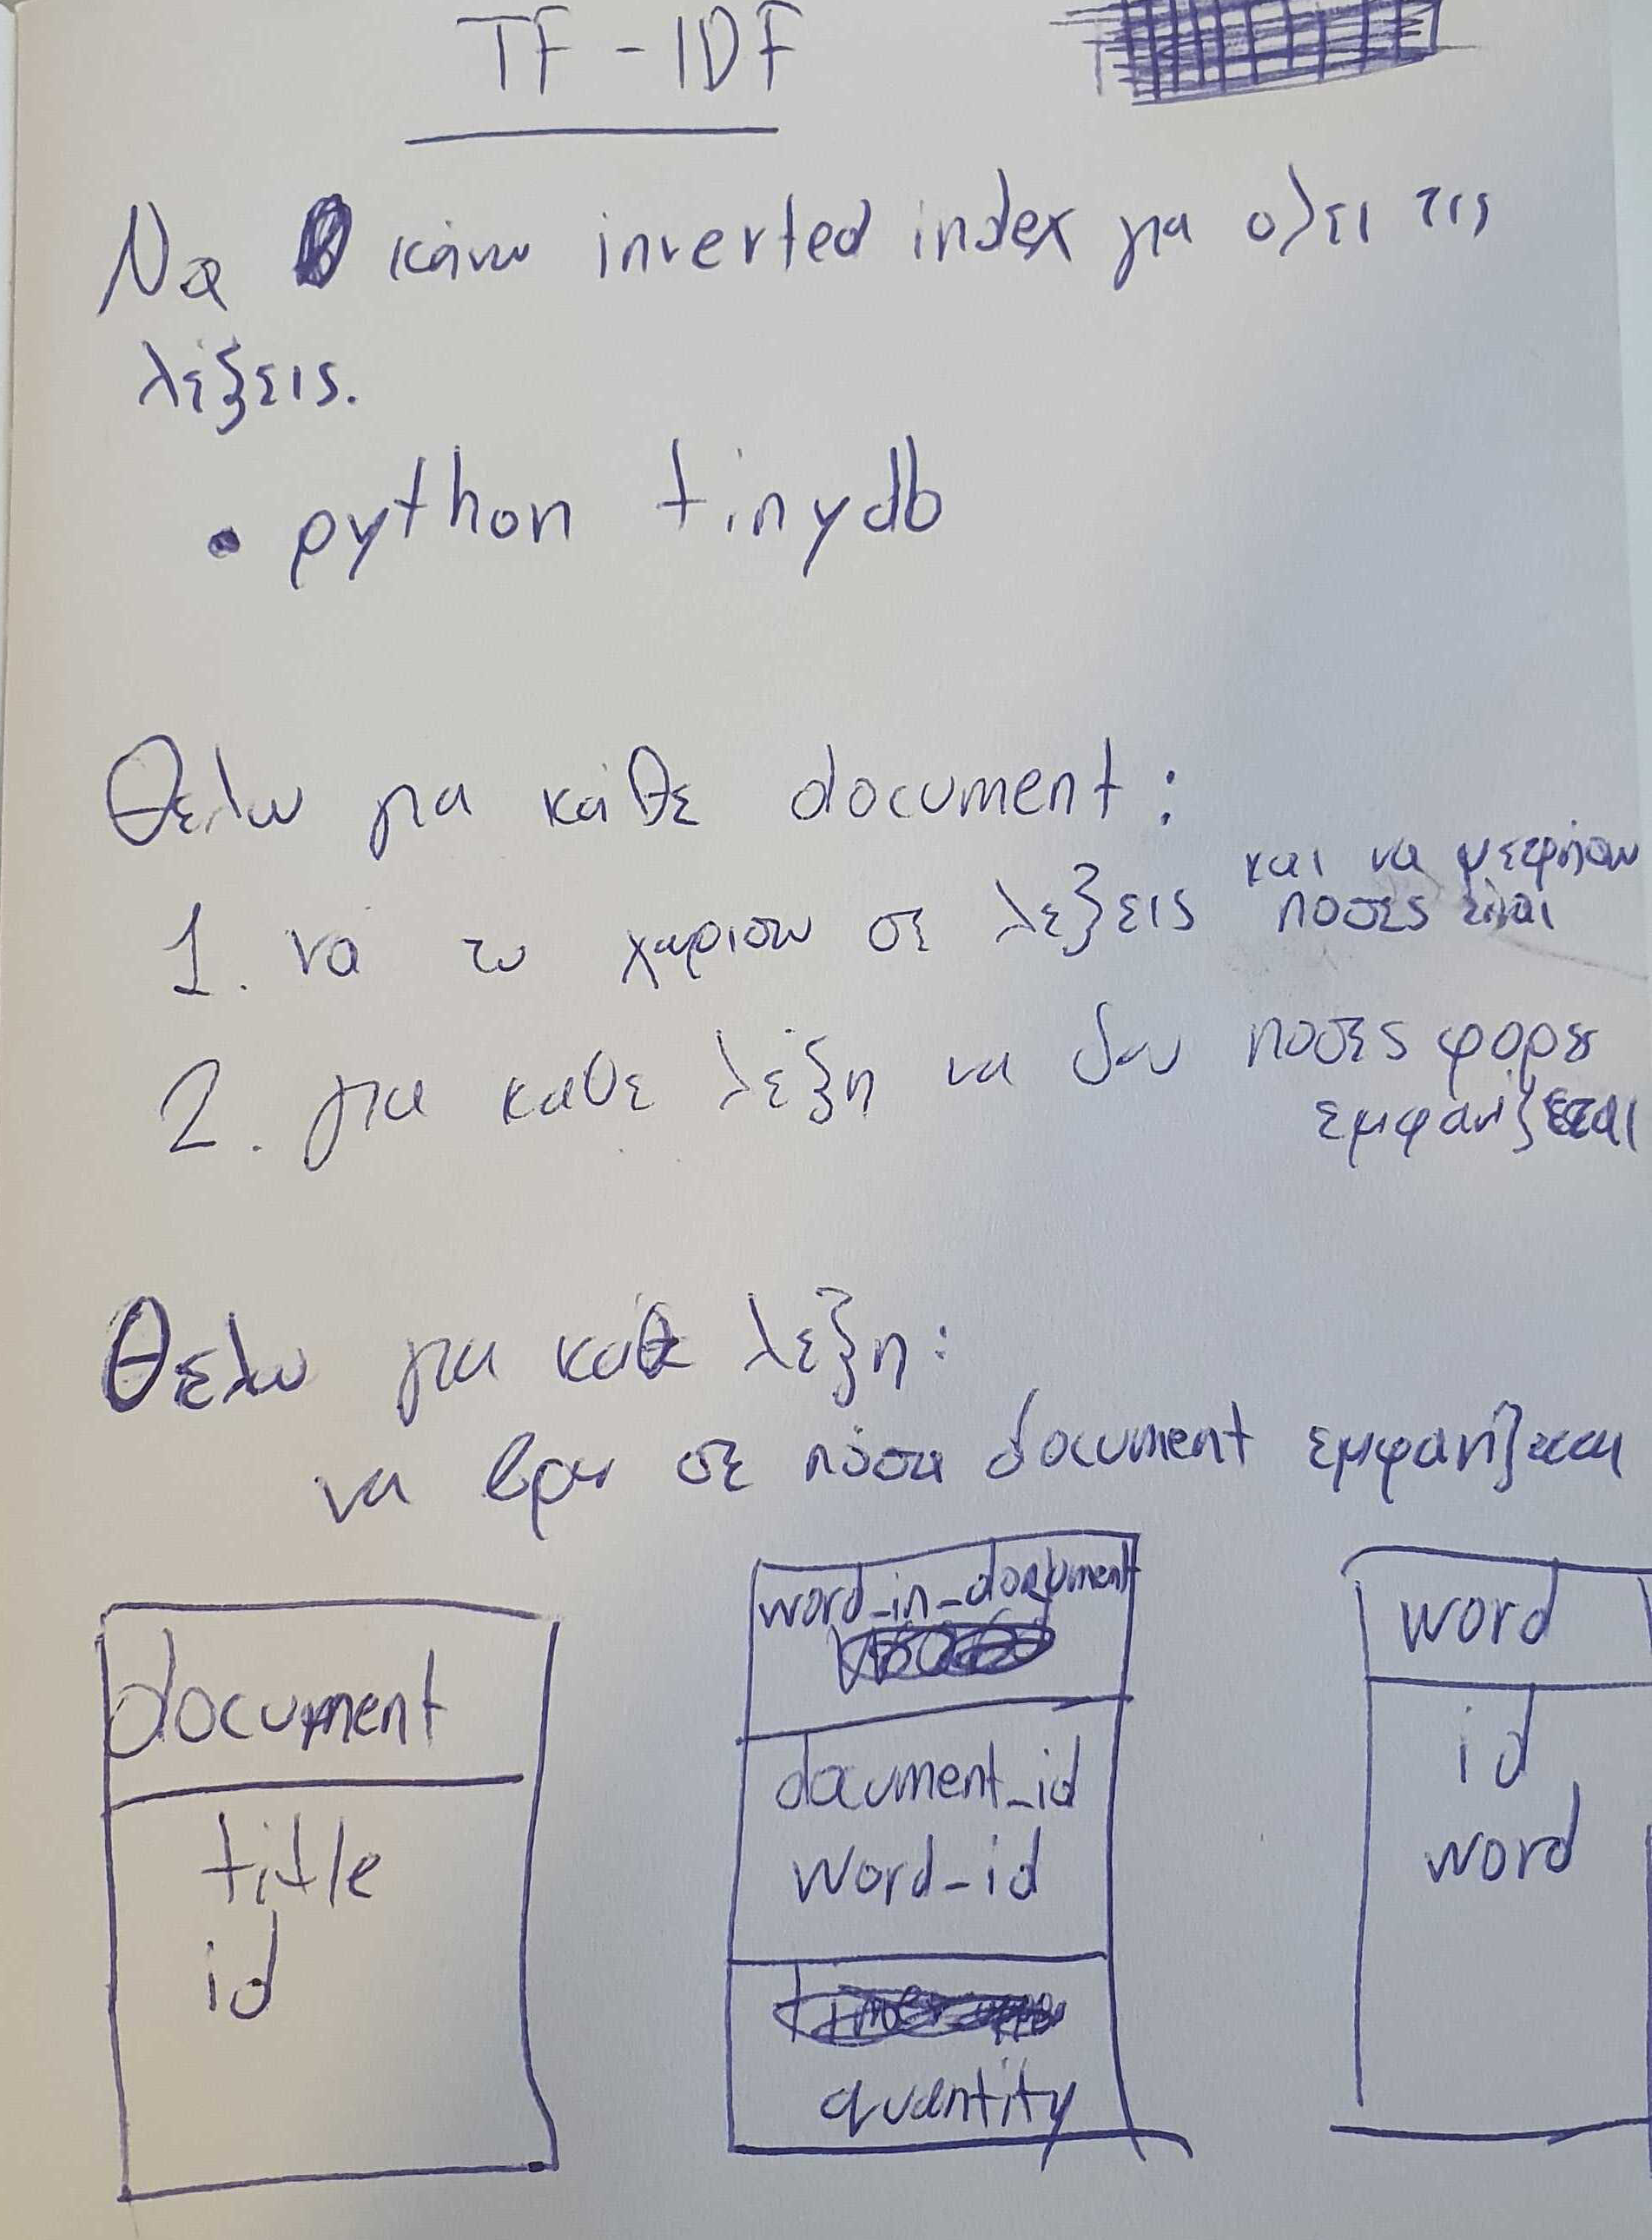